In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

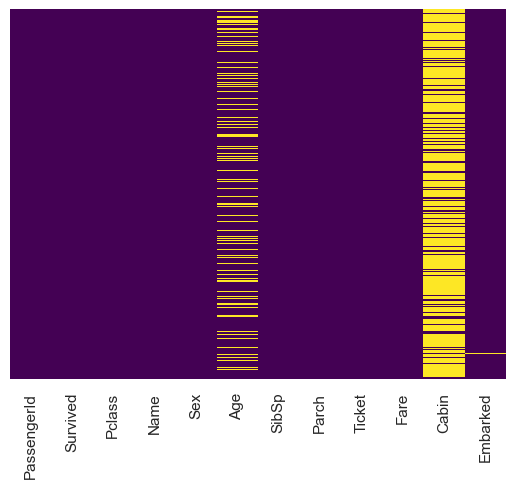

In [4]:
# Checking for missing data using heatmaps
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [5]:
train.isnull().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [6]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

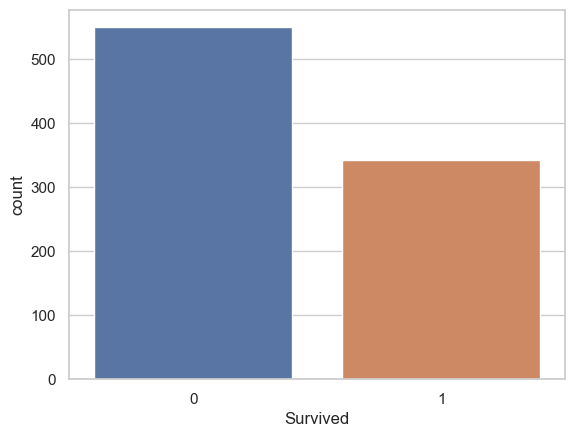

In [7]:
# for classification problems it is always better to check for the ratio of classes
sns.countplot(x= 'Survived', data = train)

<Axes: xlabel='Survived', ylabel='count'>

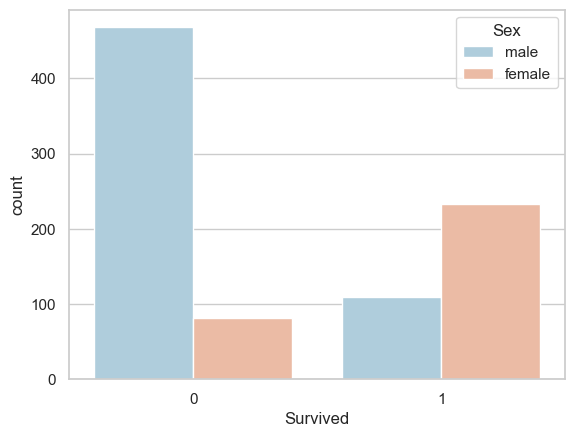

In [8]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

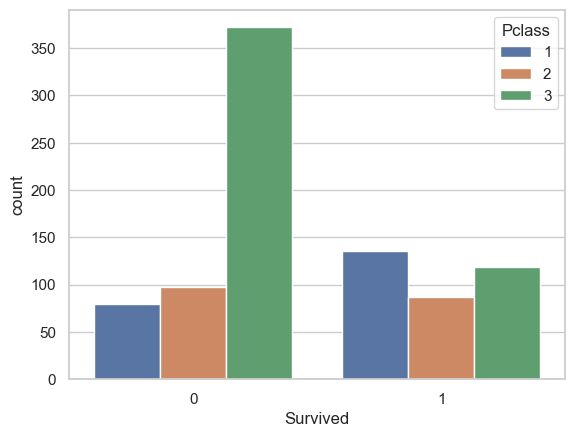

In [9]:
 sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

<Axes: xlabel='Age'>

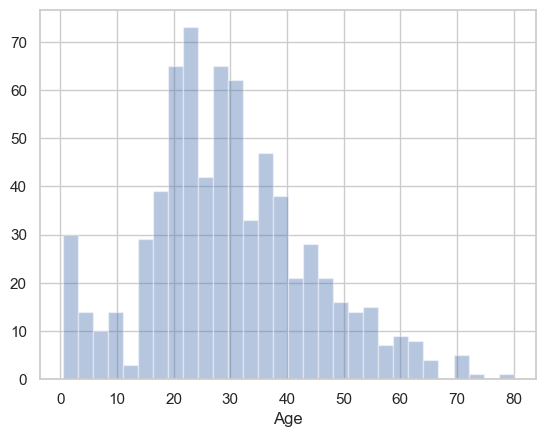

In [10]:
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)

<Axes: >

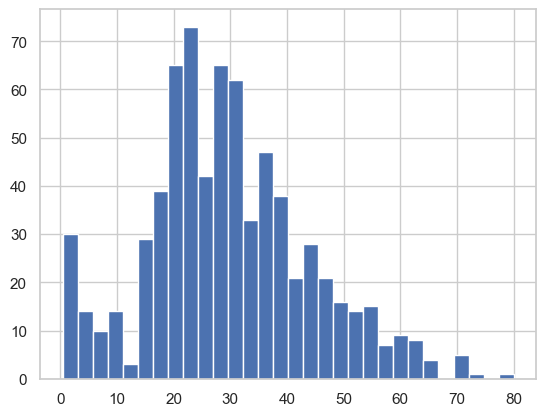

In [11]:
train['Age'].hist(bins = 30)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

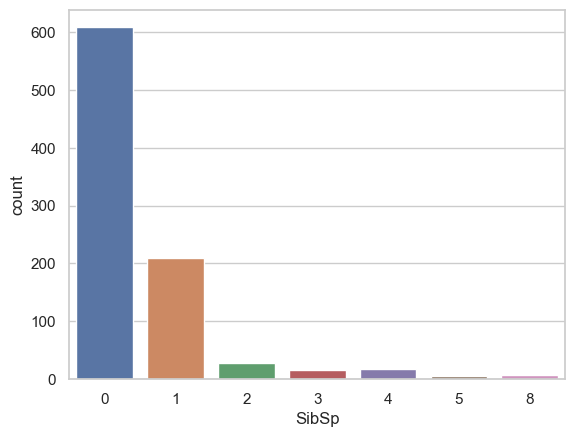

In [13]:
sns.countplot(x = 'SibSp', data = train)

<Axes: >

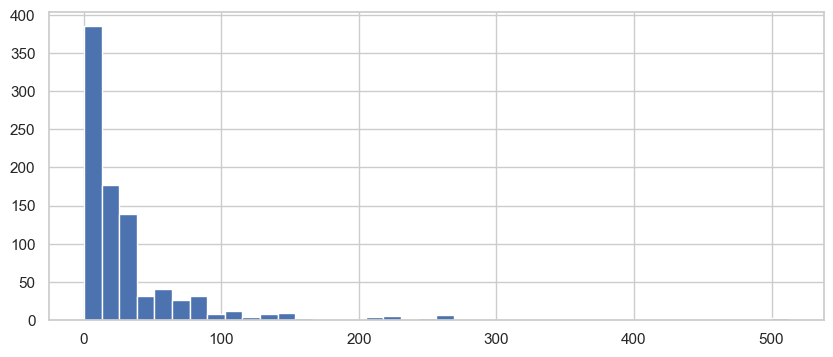

In [14]:
train['Fare'].hist(bins = 40, figsize = (10,4))

In [15]:
import cufflinks as cf

In [16]:
cf.go_offline()

In [17]:
train['Fare'].iplot(kind = 'hist', bins = 50)

### Data Cleaning

<Axes: >

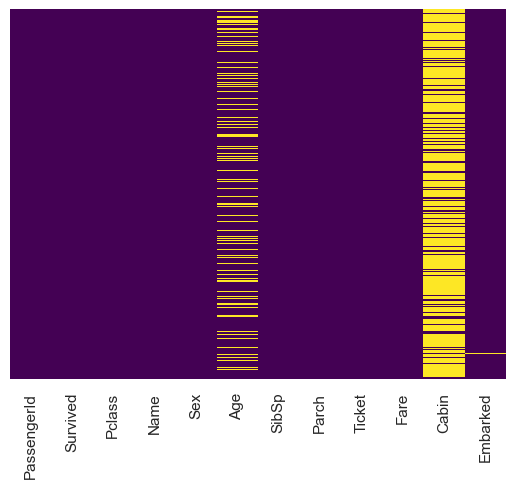

In [18]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

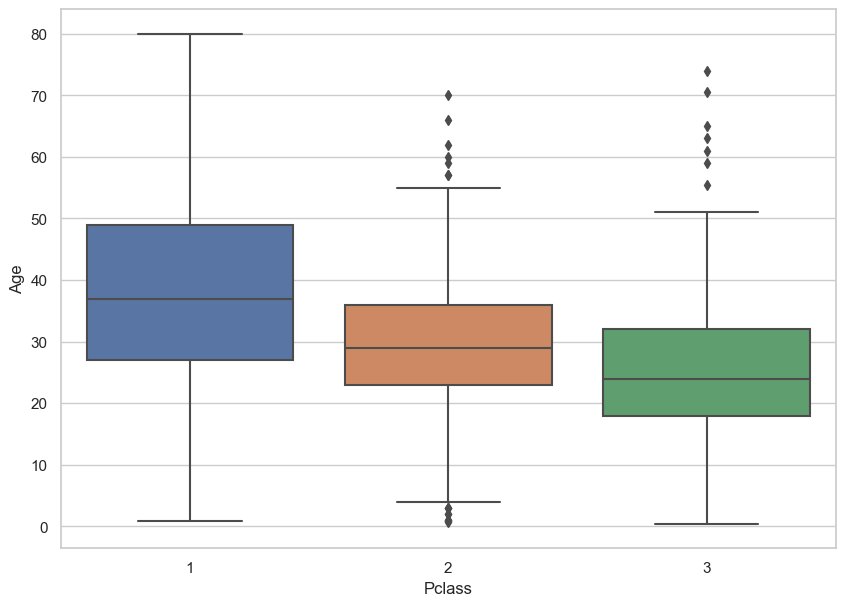

In [19]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 1:
            return 29
        else:
            return 24
    else:
        return Age
        

In [21]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

<Axes: >

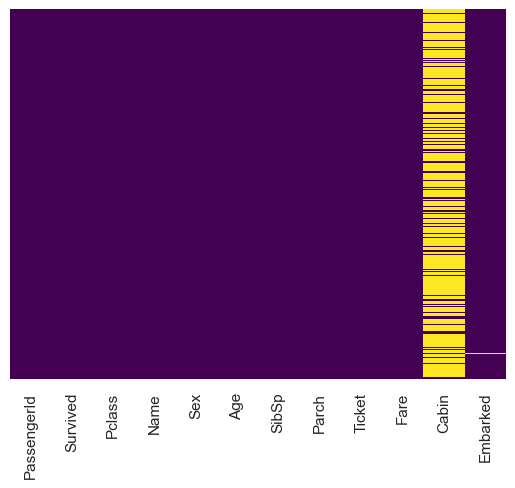

In [22]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [23]:
train.drop('Cabin', axis = 1, inplace = True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
train.dropna(inplace = True)

In [26]:
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [27]:
embarked = pd.get_dummies(train['Embarked'], drop_first = True)

In [28]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [29]:
train = pd.concat([train, sex, embarked], axis = 1)

In [59]:
pclass = pd.get_dummies(train['Pclass'], drop_first = True)

In [62]:
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [63]:
train = pd.concat([train, pclass], axis = 1)

In [64]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [31]:
train.drop(['Name', 'Sex', 'Embarked', 'Ticket'], axis = 1, inplace = True)

In [65]:
train.drop('Pclass', axis = 1, inplace = True)

In [66]:
 train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [67]:
# Training and Testing the data
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [70]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logmodel = LogisticRegression()

In [73]:
logmodel.fit(X_train, y_train)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [74]:
predictions = logmodel.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 31,  73]], dtype=int64)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier()

In [48]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
predictions1 = rf.predict(X_test)

In [54]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       163
           1       0.76      0.71      0.73       104

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



In [56]:
print(confusion_matrix(y_test, predictions1))

[[139  24]
 [ 30  74]]
